In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv("/content/Credit Card Customer Data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [8]:
X = df.select_dtypes(['int64','float64'])

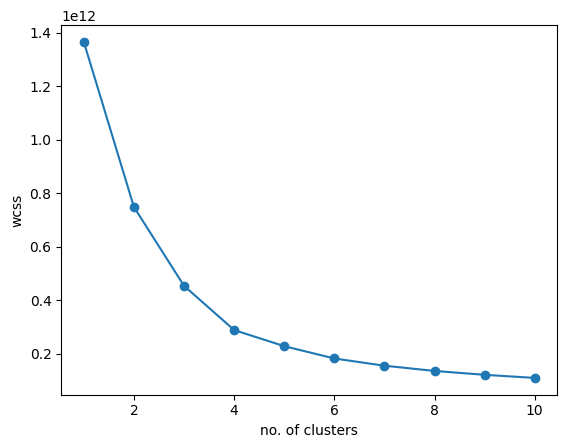

In [11]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i , init='k-means++', max_iter=100,n_init=10,random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4, init='k-means++' , max_iter=100, n_init=10,random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

print(df.head())

   Sl_No  Customer Key  ...  Total_calls_made  Cluster
0      1         87073  ...                 0        3
1      2         38414  ...                 9        3
2      3         17341  ...                 4        2
3      4         40496  ...                 4        2
4      5         47437  ...                 3        3

[5 rows x 8 columns]


In [17]:
# task 2

df2 = pd.read_excel("/content/Online Retail.xlsx")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [22]:
df2.dropna(subset=['CustomerID'],inplace=True)

In [23]:
df2 = df2[df2['Quantity']>0]

In [24]:
df2['Spent'] = df2['Quantity']*df2['UnitPrice']

/tmp/ipython-input-3068293478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Spent'] = df2['Quantity']*df2['UnitPrice']


In [29]:
cust_df = df2.groupby('CustomerID').agg({'Quantity':'sum', 'Spent':'sum'}).reset_index()

In [31]:
cust_df.rename(columns={'Quantity':'TotalItems'}, inplace=True)

In [33]:
features = cust_df[['TotalItems','Spent']].values
features = (features - features.mean(axis=0))/features.std(axis=0)

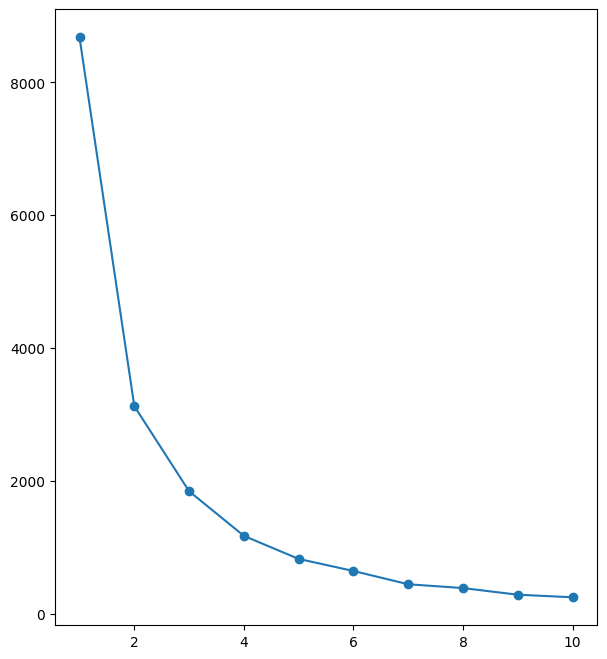

In [34]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i , max_iter=100, init='k-means++' , random_state=0)
  kmeans.fit(features)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,8))
plt.plot(range(1,11),wcss,marker='o')

In [38]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=100,random_state=0)
cust_df['Cluster'] = kmeans.fit_predict(features)
print(f"customer data\n: {cust_df.head()}")

customer data
:    CustomerID  TotalItems     Spent  Cluster
0     12346.0       74215  77183.60        2
1     12347.0        2458   4310.00        0
2     12348.0        2341   1797.24        0
3     12349.0         631   1757.55        0
4     12350.0         197    334.40        0


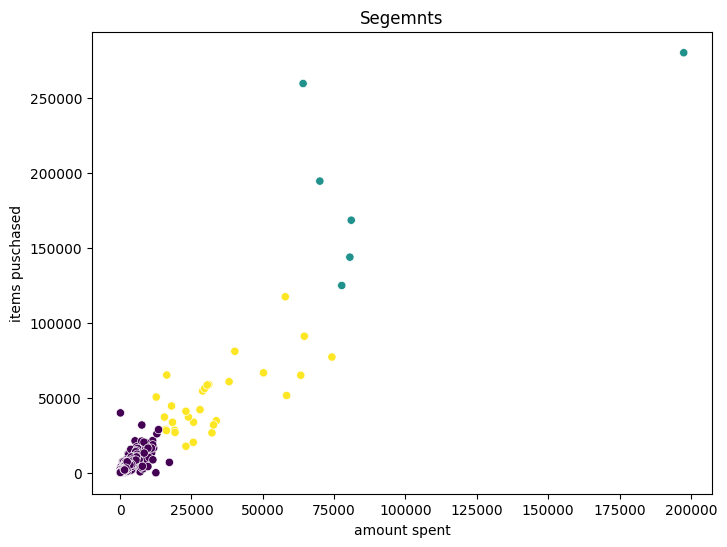

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=cust_df['TotalItems'],y=cust_df['Spent'],c=cust_df['Cluster'],cmap='viridis')
plt.title('Segemnts')
plt.xlabel('amount spent')
plt.ylabel('items puschased')
plt.show()

In [45]:
print('Cluster means for Task 2:')
print(cust_df.groupby('Cluster')[['TotalItems', 'Spent']].mean())
print('Cluster sizes for Task 2:')
print(cust_df['Cluster'].value_counts())


Cluster means for Task 2:
           TotalItems          Spent
Cluster                             
0          846.860562    1457.766661
1        95131.666667  195271.033333
2        32228.833333   48900.392000
Cluster sizes for Task 2:
Cluster
0    4303
2      30
1       6
Name: count, dtype: int64


nterpretation: Cluster 0 represents low-activity customers with low items and spend - target with promotions to increase engagement. Cluster 1 is regular customers with medium spend - offer loyalty programs to upsell. Cluster 2 is high-value bulk buyers - provide personalized VIP services and exclusive deals for retention. This segmentation aids targeted marketing strategies



In [46]:
df = pd.read_csv("/content/CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [47]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [48]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [49]:
df.dtypes

,0
CUST_ID,object
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64


In [50]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [52]:
df = df.apply(lambda col: col.fillna(col.median()) if col.dtype != 'object' else col.fillna(col.mode()[0]))

In [53]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [55]:
features = [
    "BALANCE",
    "BALANCE_FREQUENCY",
    "PURCHASES",
    "ONEOFF_PURCHASES",
    "INSTALLMENTS_PURCHASES",
    "CASH_ADVANCE",
    "PURCHASES_FREQUENCY",
    "ONEOFF_PURCHASES_FREQUENCY",
    "PURCHASES_INSTALLMENTS_FREQUENCY",
    "CASH_ADVANCE_FREQUENCY",
    "CASH_ADVANCE_TRX",
    "PURCHASES_TRX",
    "CREDIT_LIMIT",
    "PAYMENTS",
    "MINIMUM_PAYMENTS",
    "PRC_FULL_PAYMENT",
    "TENURE"
]

df = df[features]

<Axes: >

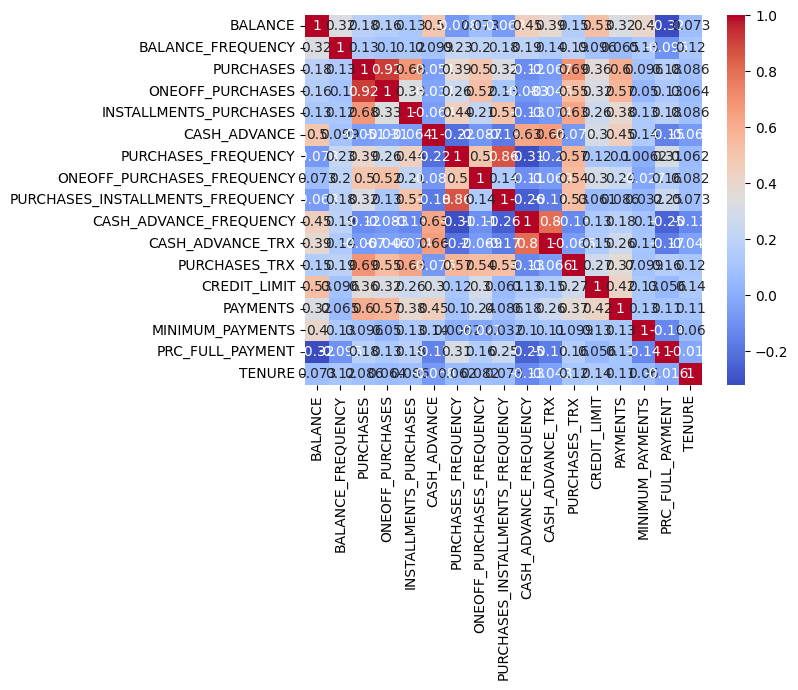

In [56]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df = scaler.fit_transform(df)

In [60]:
pca = PCA()
pca_res = pca.fit_transform(df)

In [63]:
exp = pca.explained_variance_ratio_

print("explained: \n")
for i,v in enumerate(exp,start=1):
  print(f"PC{i}: {v:.3f}")

explained: 

PC1: 0.273
PC2: 0.203
PC3: 0.088
PC4: 0.075
PC5: 0.062
PC6: 0.057
PC7: 0.049
PC8: 0.043
PC9: 0.038
PC10: 0.031
PC11: 0.024
PC12: 0.018
PC13: 0.014
PC14: 0.012
PC15: 0.010
PC16: 0.003
PC17: 0.000


<function matplotlib.pyplot.show(close=None, block=None)>

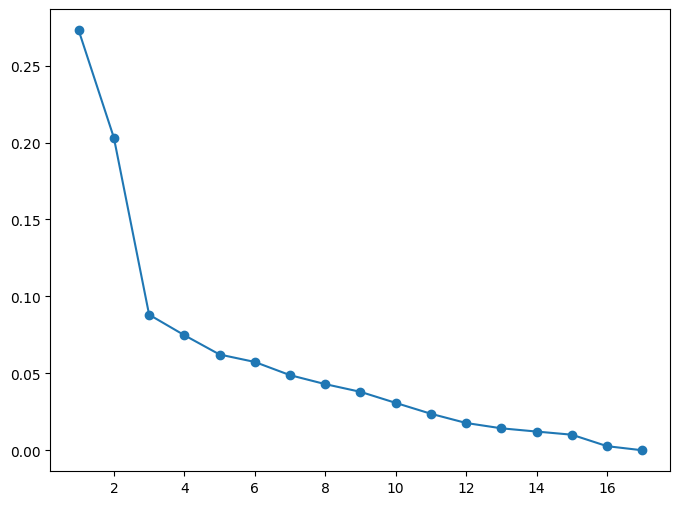

In [64]:
plt.figure(figsize=(8,6))
plt.plot(range(1,len(exp)+1),exp,marker='o')
plt.show

In [66]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
k = np.argmax(var_cum>=0.90)+1
print(var_cum[:k])

[0.27297671 0.47611451 0.56424633 0.63904157 0.70128886 0.75868943
 0.80752368 0.85051572 0.8884983  0.91929833]


In [68]:
pca2 = PCA(n_components=k)
final_data = pca2.fit_transform(df)
print(f"final data: {final_data[:5]}")

final data: [[-1.68364879e+00 -1.07224148e+00 -4.75660084e-01  6.79927757e-01
  -4.31950796e-02 -6.80694164e-02 -8.22155259e-01 -1.89517812e-02
   1.18335937e-01  7.81956004e-02]
 [-1.13408493e+00  2.50914981e+00 -6.02216308e-01 -1.09542056e-01
  -6.62637767e-01  1.10225463e+00  3.84282079e-01  1.76153547e-01
   6.74472271e-01  7.77929470e-01]
 [ 9.69394988e-01 -3.83576903e-01 -9.09697616e-02  1.23835940e+00
   2.16658421e+00  3.20185012e-01  1.54249644e+00 -2.29364329e-01
  -8.67802735e-01  1.74404835e-03]
 [-8.88220393e-01  4.64842251e-03 -1.49980039e+00  1.07527139e+00
  -2.25827869e-01  1.71539784e-01  2.36644433e-01 -6.90410271e-01
  -6.42454499e-02 -3.93690162e-01]
 [-1.60002095e+00 -6.83795239e-01 -3.47926710e-01  1.01364222e+00
   4.53815736e-01 -7.70042735e-02 -6.98278192e-01  2.45310945e-01
   5.78031830e-01  1.22072566e-01]]


In [69]:
loadings = pd.DataFrame(
    pca2.components_,
    columns=features,
    index=[f"PC{i+1}" for i in range(k)]
)
print("\nPCA Loadings (Feature Contribution to Each Component):\n")
print(loadings.round(3))


PCA Loadings (Feature Contribution to Each Component):

      BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
PC1     0.102              0.120  ...             0.132   0.081
PC2     0.404              0.131  ...            -0.190  -0.004
PC3     0.162              0.423  ...            -0.126   0.068
PC4     0.279              0.156  ...            -0.420   0.438
PC5    -0.051              0.477  ...            -0.143   0.002
PC6    -0.043             -0.022  ...             0.353   0.745
PC7     0.254             -0.101  ...             0.300  -0.404
PC8    -0.170              0.283  ...             0.573   0.096
PC9     0.129              0.616  ...             0.233  -0.206
PC10   -0.031              0.082  ...            -0.241  -0.054

[10 rows x 17 columns]
